In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        
    'exponential': np.random.exponential(10, 1000), 
    'normal_p': np.random.normal(10, 2, 1000),      
    'normal_l': np.random.normal(10, 10, 1000),    
})

In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,58.101901,1.376047,9.586411,7.499599,21.691409
1,27.948181,2.904345,11.152051,15.087785,19.387303
2,52.102719,4.018462,7.714326,10.569900,20.553567
3,58.937418,1.068477,7.020839,10.404505,15.949972
4,52.610389,12.703533,8.604671,32.278511,23.048035


D:\a\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


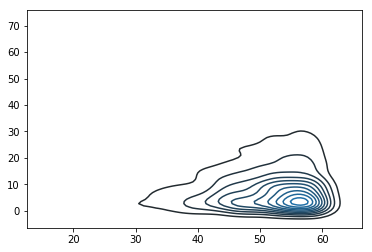

In [14]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.109791,10.310607,10.186446,9.800547,0.134886
std,8.153600,10.217997,1.925005,10.030255,20.276572
min,18.857577,0.017561,4.127314,-23.920307,-29.150976
25%,45.814753,3.041453,8.948169,3.419154,-20.044509
50%,52.324758,7.214985,10.131407,10.141006,0.516804
75%,56.578621,13.971273,11.421581,16.562348,20.027003
max,59.994989,69.329784,16.147228,41.985683,29.829037


D:\a\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


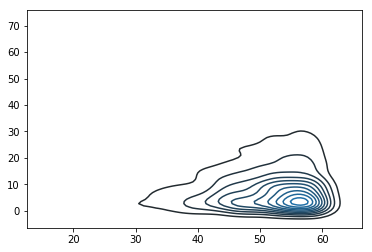

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

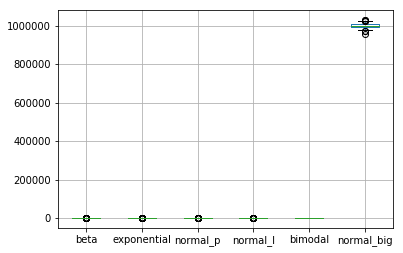

In [15]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [17]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()


In [19]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.980685,-0.874832,-0.311861,-0.229516,1.063657,2.229160
1,-2.719376,-0.725188,0.501863,0.527393,0.949966,-1.210281
2,0.244545,-0.616099,-1.284858,0.076742,1.007512,-1.826406
3,1.083208,-0.904948,-1.645290,0.060244,0.780359,0.644201
4,0.306840,0.234305,-0.822111,2.242137,1.130596,2.569177


D:\a\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
D:\a\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


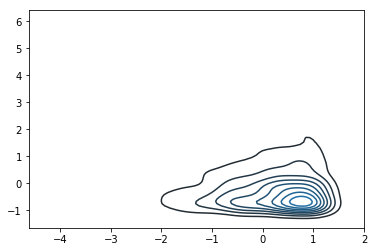

In [20]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [21]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.124212e-15,-3.463896e-17,-1.915352e-16,-2.481348e-17,-4.685141e-17,-3.925610e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.834853e+00,-1.007849e+00,-3.149169e+00,-3.363596e+00,-1.445043e+00,-4.562894e+00
25%,-5.270295e-01,-7.117629e-01,-6.435809e-01,-6.365328e-01,-9.957054e-01,-6.407661e-01
50%,2.717910e-01,-3.031095e-01,-2.860588e-02,3.396019e-02,1.884487e-02,-3.859286e-02
75%,7.937680e-01,3.584360e-01,6.419481e-01,6.744778e-01,9.815304e-01,6.522611e-01
max,1.212979e+00,5.778893e+00,3.098052e+00,3.210411e+00,1.465189e+00,2.776853e+00


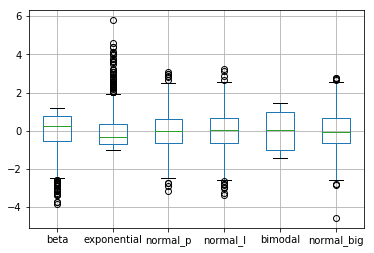

In [22]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()